In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np

# Question 1 Exploratory Data Analysis

* From example/input/ load compustat.csv inside compustat.zip  without unzip compustat.zip
* 1. Variable names that we are interested in:
    * sic code: four digits integer for company
    * datecqtr: year/ quarter time for the record
    * cusip: compustats identifier for a company
    * chod: shares out of standing (in million)
    * saleq: sales of current quarter (in million)
    * prccq: close price of current quarter (in dollar)
    
* 2. For saleq and market cap, compute the following:
    * Time series mean 
    * Time Series standard deviation
    * Time Series count of missing values
    * Time Series ratio of missing values
    * Aggregate the result in a dataframe
        
* 3. Answer the following questions:
    * Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?
    * Implement some schemes to detect outliers.
    * Do you find some outliers? Could you think why? You can do some research using google.
    * What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.

In [1]:
import numpy as np
import pandas as pd

#data = pd.read_csv("macrodata.csv")
data = pd.read_csv("compustat.csv")
data.head()

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic
0,1000,19660331,1966,1,INDL,C,D,STD,000032102,USD,1966Q1,1966Q1,0.219,NaN,I,NaN,3089.0
1,1000,19660630,1966,2,INDL,C,D,STD,000032102,USD,1966Q2,1966Q2,0.219,NaN,I,NaN,3089.0
2,1000,19660930,1966,3,INDL,C,D,STD,000032102,USD,1966Q3,1966Q3,0.219,NaN,I,NaN,3089.0
3,1000,19661231,1966,4,INDL,C,D,STD,000032102,USD,1966Q4,1966Q4,0.219,4.032,I,NaN,3089.0
4,1000,19670331,1967,1,INDL,C,D,STD,000032102,USD,1967Q1,1967Q1,0.277,NaN,I,NaN,3089.0


In [2]:
data["market cap"] = data["cshoq"]*data["prccq"]
data.head(20)

,gvkey,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,cusip,curcdq,datacqtr,datafqtr,cshoq,saleq,costat,prccq,sic,market cap
0,1000,19660331,1966,1,INDL,C,D,STD,000032102,USD,1966Q1,1966Q1,0.219,NaN,I,NaN,3089.0,NaN
1,1000,19660630,1966,2,INDL,C,D,STD,000032102,USD,1966Q2,1966Q2,0.219,NaN,I,NaN,3089.0,NaN
2,1000,19660930,1966,3,INDL,C,D,STD,000032102,USD,1966Q3,1966Q3,0.219,NaN,I,NaN,3089.0,NaN
3,1000,19661231,1966,4,INDL,C,D,STD,000032102,USD,1966Q4,1966Q4,0.219,4.032,I,NaN,3089.0,NaN
4,1000,19670331,1967,1,INDL,C,D,STD,000032102,USD,1967Q1,1967Q1,0.277,NaN,I,NaN,3089.0,NaN
5,1000,19670630,1967,2,INDL,C,D,STD,000032102,USD,1967Q2,1967Q2,0.277,NaN,I,NaN,3089.0,NaN
6,1000,19670930,1967,3,INDL,C,D,STD,000032102,USD,1967Q3,1967Q3,0.277,NaN,I,NaN,3089.0,NaN
7,1000,19671231,1967,4,INDL,C,D,STD,000032102,USD,1967Q4,1967Q4,0.277,5.363,I,NaN,3089.0,NaN
8,1000,19680331,1968,1,INDL,C,D,STD,000032102,USD,1968Q1,1968Q1,0.645,NaN,I,NaN,3089.0,NaN
9,1000,19680630,1968,2,INDL,C,D,STD,000032102,USD,1968Q2,1968Q2,0.645,NaN,I,NaN,3089.0,NaN


In [97]:
#calculate the count for null and for total, so that we can then calculate the rate
saleq_null_count = data["saleq"].isnull().groupby(data["sic"]).count()
market_cap_null_count = data["market cap"].isnull().groupby(data["sic"]).count()
saleq_total_count = data["saleq"].groupby(data["sic"]).count()
market_cap_total_count = data["market cap"].groupby(data["sic"]).count()
saleq_null_count.head()

sic
100.0    3486
200.0     835
700.0     812
800.0     702
900.0     139
Name: saleq, dtype: int64

In [98]:
#calculate the mean and std for saleq and market cap grouped by sic
mean = data.groupby("sic")["saleq", "market cap"].mean()
std = data.groupby("sic")["saleq", "market cap"].std()
mean.head()

,saleq,market cap
sic,,
100.0,222.266152,1206.085023
200.0,33.848893,179.306277
700.0,82.575097,461.605149
800.0,18.531667,216.377473
900.0,10.874631,20.454987


In [99]:
std.head()

,saleq,market cap
sic,,
100.0,598.684467,6245.526308
200.0,82.732609,497.197095
700.0,143.351359,1021.460138
800.0,25.453303,331.978623
900.0,6.172313,8.527221


In [100]:
saleq_result = pd.DataFrame(mean["saleq"])
market_cap_result = pd.DataFrame(mean["market cap"])

In [101]:
saleq_result = pd.concat([saleq_result, pd.DataFrame(std["saleq"])], axis = 1)
saleq_result = pd.concat([saleq_result, pd.DataFrame(saleq_null_count)], axis = 1)
saleq_result = pd.concat([saleq_result, pd.DataFrame(saleq_total_count)], axis = 1)
saleq_result.columns = ["mean", "std", "total count", "non null count"]
saleq_result["null count"] = saleq_result["total count"] - saleq_result["non null count"]
saleq_result["null ratio"] = saleq_result["null count"]/saleq_result["total count"]
saleq_result.head()

,mean,std,total count,non null count,null count,null ratio
sic,,,,,,
100.0,222.266152,598.684467,3486,3163,323,0.092656
200.0,33.848893,82.732609,835,786,49,0.058683
700.0,82.575097,143.351359,812,782,30,0.036946
800.0,18.531667,25.453303,702,598,104,0.148148
900.0,10.874631,6.172313,139,111,28,0.201439


In [102]:
market_cap_result = pd.concat([market_cap_result, pd.DataFrame(std["market cap"])], axis = 1)
market_cap_result = pd.concat([market_cap_result, pd.DataFrame(market_cap_null_count)], axis = 1)
market_cap_result = pd.concat([market_cap_result, pd.DataFrame(market_cap_total_count)], axis = 1)
market_cap_result.columns = ["mean", "std", "total count", "non null count"]
market_cap_result["null count"] = market_cap_result["total count"] - market_cap_result["non null count"]
market_cap_result["null ratio"] = market_cap_result["null count"]/market_cap_result["total count"]
market_cap_result.head()

,mean,std,total count,non null count,null count,null ratio
sic,,,,,,
100.0,1206.085023,6245.526308,3486,2780,706,0.202524
200.0,179.306277,497.197095,835,551,284,0.340120
700.0,461.605149,1021.460138,812,482,330,0.406404
800.0,216.377473,331.978623,702,446,256,0.364672
900.0,20.454987,8.527221,139,73,66,0.474820


In [103]:
print("We can describe the statistics so that we may detect outliers")

We can describe the statistics so that we may detect outliers


In [105]:
print("saleq: ")
print(data["saleq"].groupby(data['sic']).describe())

saleq: 
          count         mean           std       min        25%        50%  \
sic                                                                          
100.0    3163.0   222.266152    598.684467    -0.016    2.05150    11.6780   
200.0     786.0    33.848893     82.732609    -0.139    0.32850     2.0935   
700.0     782.0    82.575097    143.351359     0.000    1.22475    12.6515   
800.0     598.0    18.531667     25.453303    -7.800    0.56250     8.1620   
900.0     111.0    10.874631      6.172313     0.000    7.95500    10.9050   
1000.0  24597.0   195.778470   1727.619864   -36.163    0.00000     0.0000   
1040.0  27925.0    41.200727    202.187044  -184.680    0.00000     0.0000   
1044.0   1098.0     7.806331     15.369993    -0.196    0.00000     0.2770   
1090.0   3679.0    17.715581     79.957455   -11.872    0.00000     0.0000   
1220.0   2634.0   220.629800    452.042015    -0.521    9.90075    66.6950   
1221.0    783.0   123.636724    199.741879     0.000    

In [106]:
print("market cap: ")
print(data["market cap"].groupby(data['sic']).describe())

market cap: 
          count          mean           std       min         25%  \
sic                                                                 
100.0    2780.0   1206.085023   6245.526308  0.015230   20.625000   
200.0     551.0    179.306277    497.197095  0.043270    2.160328   
700.0     482.0    461.605149   1021.460138  0.229500    8.215250   
800.0     446.0    216.377473    331.978623  0.189750    5.460875   
900.0      73.0     20.454987      8.527221  4.629375   12.048087   
1000.0  21369.0   1012.050135   8694.154559  0.000370    5.043060   
1040.0  24364.0    582.820441   2502.646638  0.000000    8.710304   
1044.0   1018.0    153.208712    338.752933  0.064710    7.416082   
1090.0   3308.0    333.626809   1385.137670  0.097370    7.344200   
1220.0   2208.0    859.080649   1972.757580  0.001999   37.077300   
1221.0    682.0    266.918313    417.872601  0.013500   16.700812   
1311.0  49445.0   1293.688381   5735.817336  0.000000   11.063000   
1381.0   5049.0   181

In [107]:
print("If you detect that the max in each row is much higher than 75%, for example, 200 times more than 75%")
print("Then it is reasonable to believe there are outliers")

If you detect that the max in each row is much higher than 75%, for example, 200 times more than 75%
Then it is reasonable to believe there are outliers


# Question 2 Compute Industry Concentration

The defination of HHI index could be found: 

https://www.investopedia.com/terms/h/hhi.asp#:~:text=The%20Herfindahl%2DHirschman%20Index%20(HHI)%20is%20a%20commonly%20accepted,close%20to%20zero%20to%2010%2C000.

This index is used to measure the industry concentration and was used by congressman to determine whether to approve a merge deal or not.

Using the same data in question 1. Compute a panel data for HHI index for all industry, using a 2 digit SIC code.

Choose top 4 industry with the highest average HHI index, plot their time series pattern of HHI in a 2 by 2 figure.

In [122]:
import matplotlib.pyplot as plt
part = data[ ['sic', 'datafqtr', 'market cap'] ]
p=part.dropna(axis=0,how='any').copy()
p.head()

,sic,datafqtr,market cap
18,3089.0,1970Q3,26.202500
19,3089.0,1970Q4,24.460000
20,3089.0,1971Q1,34.193250
21,3089.0,1971Q2,29.023500
22,3089.0,1971Q3,16.256875


In [126]:
industrialtotal = p['market cap'].groupby([data2nna['datafqtr'],data2nna['sic'] ]).sum()
industrialtotal = pd.DataFrame(industrialtotal).reset_index().rename(columns={'market cap': 'total'})
industrialtotal.head()

,datafqtr,sic,total
0,1962Q1,6020.0,13222.092238
1,1962Q2,4011.0,537.735850
2,1962Q2,6020.0,10331.887282
3,1962Q3,4011.0,541.851200
4,1962Q3,4512.0,56.848000


In [131]:
result = pd.merge(p, industrialtotal, on= ['datafqtr','sic'])
result['Sn'] = ( result['market cap'] / result['total'] ) **2
result.head()

,sic,datafqtr,market cap,total,Sn
0,3089.0,1970Q3,26.2025,906.8965,0.000835
1,3089.0,1970Q3,719.5275,906.8965,0.629476
2,3089.0,1970Q3,10.1200,906.8965,0.000125
3,3089.0,1970Q3,36.1800,906.8965,0.001592
4,3089.0,1970Q3,11.9560,906.8965,0.000174


In [135]:
HHI = pd.DataFrame(result['Sn'].groupby([result['datafqtr'],result['sic'] ]).sum()).reset_index().rename(columns = {'Sn':'HHI'})
HHI.head()

,datafqtr,sic,HHI
0,1962Q1,6020.0,0.056406
1,1962Q2,4011.0,0.301396
2,1962Q2,6020.0,0.054330
3,1962Q3,4011.0,0.298028
4,1962Q3,4512.0,1.000000


In [136]:
mean_HHI_overtime = HHI["HHI"].groupby(HHI["sic"]).mean()
mean_HHI_overtime

sic
100.0     0.429318
200.0     0.732941
700.0     0.821731
800.0     0.711929
900.0     0.922989
1000.0    0.261300
1040.0    0.122935
1044.0    0.628675
1090.0    0.666000
1220.0    0.319345
1221.0    0.619030
1311.0    0.081734
1381.0    0.196875
1382.0    0.523995
1389.0    0.498688
1400.0    0.297748
1520.0    0.776097
1531.0    0.125832
1540.0    0.440657
1600.0    0.342268
1623.0    0.330143
1700.0    0.432065
1731.0    0.574145
2000.0    0.459073
2011.0    0.390547
2013.0    0.627614
2015.0    0.428148
2020.0    0.600137
2024.0    0.705414
2030.0    0.347604
            ...   
7996.0    0.680827
7997.0    0.808609
8000.0    0.587928
8011.0    0.517034
8050.0    0.770115
8051.0    0.297673
8060.0    0.514677
8062.0    0.349760
8071.0    0.381324
8082.0    0.383711
8090.0    0.457309
8093.0    0.446853
8111.0    0.937313
8200.0    0.307167
8300.0    0.582666
8351.0    0.712204
8400.0    0.937870
8600.0    1.000000
8700.0    0.513149
8711.0    0.180144
8721.0    0.704106
8731.0  

In [137]:
print("Now, sort the series and find and plot the top 4 industries")

Now, sort the series and find and plot the top 4 industries


In [139]:
mean_HHI_overtime = mean_HHI_overtime.sort_values(ascending = False)
mean_HHI_overtime.head()

sic
9998.0    1.0
7829.0    1.0
5050.0    1.0
5064.0    1.0
6022.0    1.0
Name: HHI, dtype: float64

In [142]:
s9998 = HHI[HHI["sic"] == 9998.0]
del s9998["sic"]
s9998.index = s9998["datafqtr"]
del s9998["datafqtr"]
s9998.head()

,HHI
datafqtr,
1999Q1,1.0
1999Q2,1.0
1999Q3,1.0
1999Q4,1.0
2000Q1,1.0


In [143]:
s7829 = HHI[HHI["sic"] == 7829.0]
s5050 = HHI[HHI["sic"] == 5050.0]
s5064 = HHI[HHI["sic"] == 5064.0]
del s7829["sic"]
s7829.index = s7829["datafqtr"]
del s7829["datafqtr"]
del s5050["sic"]
s5050.index = s5050["datafqtr"]
del s5050["datafqtr"]
del s5064["sic"]
s5064.index = s5064["datafqtr"]
del s5064["datafqtr"]

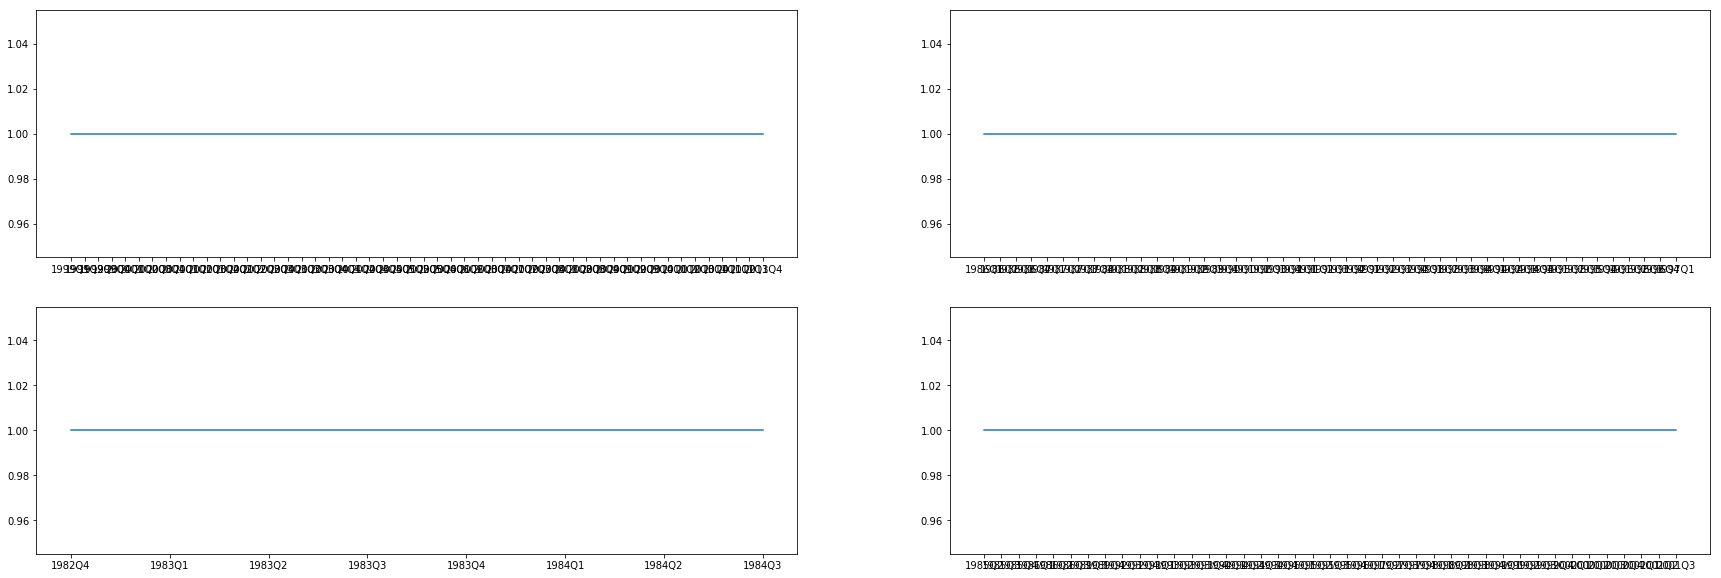

In [144]:
plt.rcParams["figure.figsize"] = (30,10)
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.plot(s9998.index, s9998)
ax2.plot(s7829.index, s7829)
ax3.plot(s5050.index, s5050)
ax4.plot(s5064.index, s5064)

In [146]:
print("I am confused by using 2 digit SIC code, since the SIC code is 4 digit, why and how should we use 2 digit code?")
print("I believe the other part of program such as calculate HHI and sorting does not have big problems")
print("but maybe the 2 digit code causes big troubles")

I am confused by using 2 digit SIC code, since the SIC code is 4 digit, why and how should we use 2 digit code?
I believe the other part of program such as calculate HHI and sorting does not have big problems
but maybe the 2 digit code causes big troubles
